<a href="https://colab.research.google.com/github/guyb2022/ML_DS_Training/blob/main/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
import tensorflow as tf

from tensorflow import keras
from keras import layers

from keras.preprocessing.image import ImageDataGenerator
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You have to include the full link to the csv file containing your dataset
#bike = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bike_sharing_daily.csv')

<a id="Overview the Data Set"></a> <br>
# Overview the Data Set
* We will use "sign language digits data set" for this tutorial.
* In this data there are 2062 sign language digits images.
* As you know digits are from 0 to 9. Therefore there are 10 unique sign.
* At the beginning of tutorial we will use only sign 0 and 1 for simplicity. 
* In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.
* Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).
* Note: Actually 205 sample is very very very little for deep learning. But this is tutorial so it does not matter so much. 
* Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

(-0.5, 63.5, 63.5, -0.5)

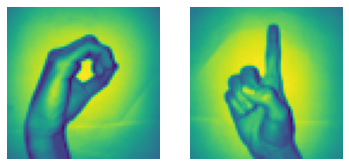

In [ ]:
# load data set
x_l = np.load('/content/drive/My Drive/Colab Notebooks/sign_language/X.npy')
Y_l = np.load('/content/drive/My Drive/Colab Notebooks/sign_language/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

* In order to create image array, I concatenate zero sign and one sign arrays
* Then I create label array 0 for zero sign images and 1 for one sign images.

In [ ]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("y shape: " , y.shape)

X shape:  (410, 64, 64)
y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1) 
* Lets split X and Y into train and test sets.
    * test_size = percentage of test size. test = 15% and train = 75%
    * random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [ ]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

<font color='purple'>
What we did up to this point:
* Choose our labels (classes) that are sign zero and sign one
* Create and flatten train and test sets
* Our final inputs(images) and outputs(labels or classes) looks like this:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

In [ ]:
# Building the model
conv_model = tf.keras.models.Sequential([
                                        layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 1)),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Flatten(),
                                        layers.Dense(512, activation='relu'),
                                        layers.Dense(256, activation='relu'),
                                        layers.Dense(1, activation='sigmoid')
])

In [ ]:
conv_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 32)        

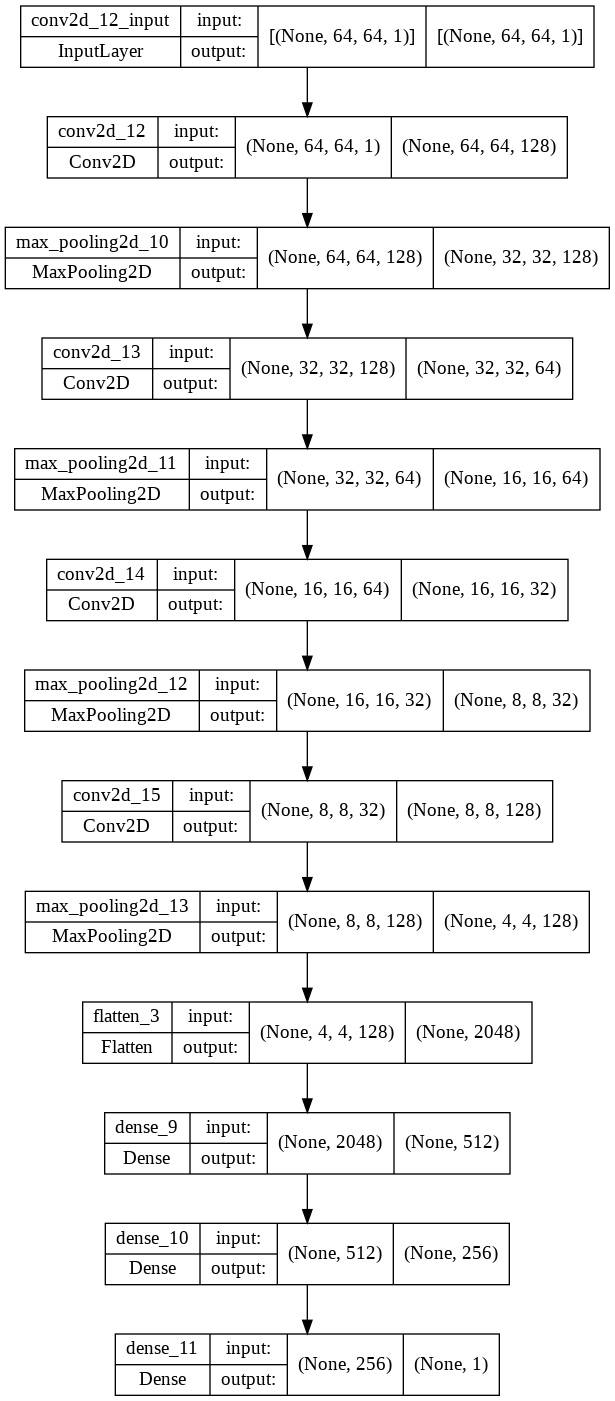

In [ ]:
keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes=True)

In [ ]:
batch_size = 128

In [ ]:
training_hist = conv_model.fit(X_train,
                               y_train,
                               epochs=5,
                               batch_size=32,
                               validation_data=(X_test,y_test)
                               )

Epoch 1/5
11/11 [==============================] - 8s 635ms/step - loss: 0.6967 - accuracy: 0.5086 - val_loss: 0.6929 - val_accuracy: 0.4677
Epoch 2/5
11/11 [==============================] - 7s 615ms/step - loss: 0.6897 - accuracy: 0.5661 - val_loss: 0.6811 - val_accuracy: 0.5323
Epoch 3/5
11/11 [==============================] - 7s 612ms/step - loss: 0.6618 - accuracy: 0.6034 - val_loss: 0.5553 - val_accuracy: 0.6774
Epoch 4/5
11/11 [==============================] - 7s 614ms/step - loss: 0.3034 - accuracy: 0.9138 - val_loss: 0.2895 - val_accuracy: 0.8548
Epoch 5/5
11/11 [==============================] - 7s 617ms/step - loss: 0.1809 - accuracy: 0.9282 - val_loss: 0.1500 - val_accuracy: 0.9516


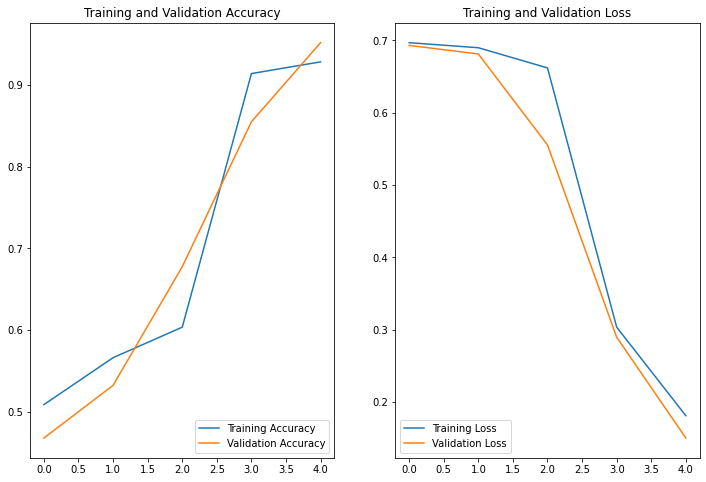

In [ ]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred = conv_model.predict(X_test)
model_accuracy = conv_model.evaluate(X_test, y_test)
print(model_accuracy)

2/2 [==============================] - 0s 133ms/step - loss: 0.1500 - accuracy: 0.9516
[0.15004518628120422, 0.9516128897666931]
